In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# T-test part

# tried this but having error with
# certificate verify failed error
# so read locial file
# url = r"https://www.sheffield.ac.uk/polopoly_fs/1.536479!/file/birthweight_reduced.csv"
# data = pd.read_csv(url) 
# data.head(10)

# read file and show first 10 rows see if everything is fine
weightFile = pd.read_csv('birthweight_reduced.csv')
weightFile.head(10)


,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
5,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal
6,1363,12,19,5.2,37,1,20,7,64,104,20,10,35,73,1,0,Low
7,575,12,19,6.1,37,1,19,7,65,132,20,14,0,72,0,0,Normal
8,822,13,19,7.5,38,0,20,0,62,103,22,14,0,70,0,0,Normal
9,1081,14,21,8.0,38,0,18,0,67,109,20,12,7,67,0,0,Normal


In [7]:
# do statistic analysis
weightFile.describe()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,13.261905,19.928571,7.264286,39.190476,0.523810,25.547619,9.428571,64.404762,125.857143,28.904762,13.666667,17.190476,70.761905,0.142857,0.095238
std,467.616186,0.766987,1.112958,1.329739,2.643336,0.505487,5.666342,12.511737,2.547687,15.879994,6.863866,2.160247,17.308165,2.843988,0.354169,0.297102
min,27.000000,12.000000,17.000000,4.200000,33.000000,0.000000,18.000000,0.000000,58.000000,99.000000,19.000000,10.000000,0.000000,66.000000,0.000000,0.000000
25%,537.250000,13.000000,19.000000,6.450000,38.000000,0.000000,20.250000,0.000000,63.000000,115.000000,23.000000,12.000000,0.000000,69.000000,0.000000,0.000000
50%,821.000000,13.000000,20.000000,7.250000,39.500000,1.000000,24.000000,4.500000,64.000000,125.000000,29.500000,14.000000,18.500000,71.000000,0.000000,0.000000
75%,1269.500000,14.000000,21.000000,8.000000,41.000000,1.000000,29.000000,15.750000,66.000000,135.000000,32.000000,16.000000,25.000000,72.000000,0.000000,0.000000
max,1764.000000,15.000000,22.000000,10.000000,45.000000,1.000000,41.000000,50.000000,71.000000,170.000000,46.000000,16.000000,50.000000,78.000000,1.000000,1.000000


In [8]:
# research question: what's the difference between low and normal weight?
# extract weight for low and normal
lowweight = weightFile.Birthweight[weightFile.LowBirthWeight=="Low"]
norweight = weightFile.Birthweight[weightFile.LowBirthWeight=="Normal"]

# compute the mean of weight for both status
weightFile[["Birthweight", "LowBirthWeight"]].groupby("LowBirthWeight").mean()


,Birthweight
LowBirthWeight,
Low,5.166667
Normal,7.613889


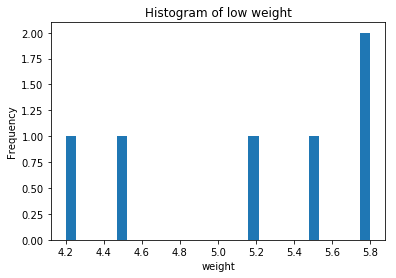

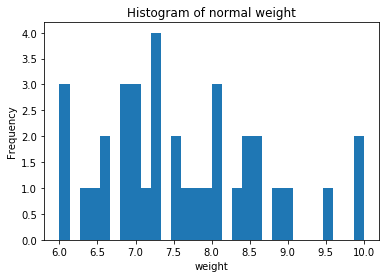

In [9]:
# visualize the distribution of low and normal weight
# histogram
plt.hist(lowweight, bins = 30)
plt.title("Histogram of low weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()

plt.hist(norweight, bins = 30)
plt.title("Histogram of normal weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()

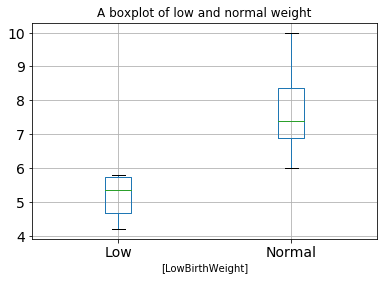

In [10]:
# boxplot
weightFile[["Birthweight", "LowBirthWeight"]].boxplot(by="LowBirthWeight", fontsize=14) # regular pandas boxplot 
plt.suptitle("")
plt.title("A boxplot of low and normal weight")
plt.show()

In [11]:
# levene's test 
teststats_Var, pvalue_Var = stats.levene(lowweight, norweight)
print("This is a hypothesis test for the homogeneity of variance assumption")
print("H0:The variances of low and normal weight are equal")
print (f"test statistics: {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of low and normal weight are equal")
    print("Proceed to perform a t-test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The variances of low and normal weight are unequal")
    print("Proceed to do a Welch's test since variances are unequal")


This is a hypothesis test for the homogeneity of variance assumption
H0:The variances of low and normal weight are equal
test statistics: 1.2669198389685288
pvalue: 0.26705370102796117
Decision: Fail to reject the null hypothesis
Conclusion: The variances of low and normal weight are equal
Proceed to perform a t-test


In [12]:
# t-test
teststats_Mean, pvalue_Mean= stats.ttest_ind(lowweight, norweight, equal_var=True)

print("T Test: This is a hypothesis test for means of male and female faculty salary")
print("H0: Means of low and normal are equal")
print (f"test statistics (t): {teststats_Mean}")
print(f"pvalue: {pvalue_Mean}")

alpha = 0.05
if pvalue_Mean > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: Means of low and normal weight are equal")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: Means of low and normal weight are unequal")


T Test: This is a hypothesis test for means of male and female faculty salary
H0: Means of low and normal are equal
test statistics (t): -5.435711661123188
pvalue: 2.9285639997008615e-06
Decision: Reject the null hypothesis
Conclusion: Means of low and normal weight are unequal


In [13]:
# ANOVA test part
    
# research question: it there a significant birthweight difference
# between different headcirumference

weightFile["headcirumference"].unique()

array([12, 13, 14, 15], dtype=int64)

In [14]:
# extract weight for different headcirumference
twelve = weightFile["Birthweight"][weightFile["headcirumference"]==12]
thirteen = weightFile["Birthweight"][weightFile["headcirumference"]==13]
fourteen = weightFile["Birthweight"][weightFile["headcirumference"]==14]
fifteen = weightFile["Birthweight"][weightFile["headcirumference"]==15]


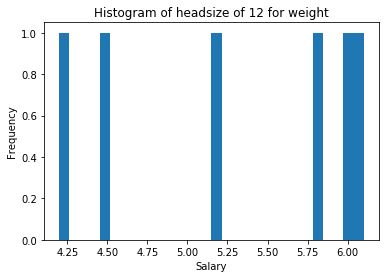

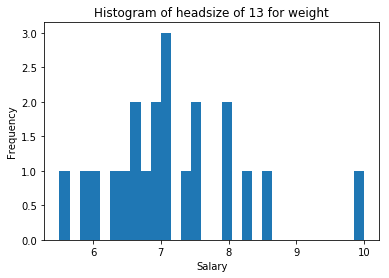

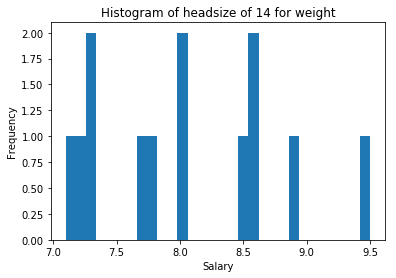

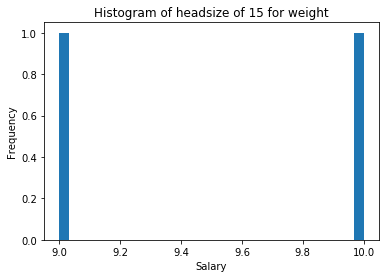

In [15]:
# visualize distribution of weight by headcirumference
plt.hist(twelve, bins = 30)
plt.title("Histogram of headsize of 12 for weight")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(thirteen, bins = 30)
plt.title("Histogram of headsize of 13 for weight")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(fourteen, bins = 30)
plt.title("Histogram of headsize of 14 for weight")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.hist(fifteen, bins = 30)
plt.title("Histogram of headsize of 15 for weight")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [16]:
# compute the descritives of all
weightFile[["Birthweight", "headcirumference"]].groupby("headcirumference").agg(["count", "mean", "median", "std","min", "max","skew"]).round(2)


Birthweight                                    
                       count  mean median   std  min   max  skew
headcirumference                                                
12                         6  5.30    5.5  0.80  4.2   6.1 -0.50
13                        21  7.13    7.0  1.02  5.5  10.0  1.00
14                        13  8.04    8.0  0.74  7.1   9.5  0.47
15                         2  9.50    9.5  0.71  9.0  10.0   NaN

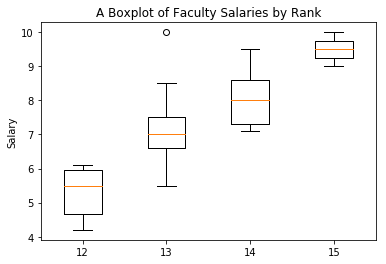

In [17]:
# box-plot
y = twelve.values, thirteen.values, fourteen.values, fifteen.values 
plt.boxplot(y)
plt.title("A Boxplot of Faculty Salaries by Rank")
plt.ylabel("Salary")
plt.xticks(np.arange(len(y))+1, ["12", "13", "14", "15"] )
plt.show()


In [18]:
# levene's test
teststats_Var, pvalue_Var = stats.levene(twelve.values, thirteen.values, fourteen.values, fifteen.values)

print("This is a hypothesis test for the homogeneity of variance assumption")
print("H0: variances of difference headsize weight are equal variances")
print (f"test statistics (F): {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of difference headcirumference weight are equal")
    print("Proceed to perform an ANOVA test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: At least the variance of one headsize differs with respect to weight")
    print("Still proceed to perform ANOVA test since the F-test is robust to the homogeneity of variance assumption")


This is a hypothesis test for the homogeneity of variance assumption
H0: variances of difference headsize weight are equal variances
test statistics (F): 0.18928387688453469
pvalue: 0.9030430309074826
Decision: Fail to reject the null hypothesis
Conclusion: The variances of difference headcirumference weight are equal
Proceed to perform an ANOVA test


In [19]:
# ANOVA TEST
teststats_Mean, pvalue_Mean = stats.f_oneway(twelve.values, thirteen.values, fourteen.values, fifteen.values)

print("One-Way ANOVA: This is a hypothesis test for means of faculty salary by rank ")
print("H0: The means of difference headcirumference weight are equal")
print (f"test statistics (F): {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The means of difference headcirumference weight are equal")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The mean weight of at least one head size is different")
    print("proceed with a follow-up or post hoc test to find which groups are different")


One-Way ANOVA: This is a hypothesis test for means of faculty salary by rank 
H0: The means of difference headcirumference weight are equal
test statistics (F): 0.18928387688453469
pvalue: 0.9030430309074826
Decision: Fail to reject the null hypothesis
Conclusion: The means of difference headcirumference weight are equal


In [21]:
# Regression part
    
from scipy.stats import stats

from statsmodels.formula.api import ols
# model 1 

x = weightFile[["motherage"]]
y = weightFile["Birthweight"]

model1 = ols("y ~ x", data=weightFile).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                 4.330e-05
Date:                Sat, 02 Jun 2018   Prob (F-statistic):              0.995
Time:                        01:11:47   Log-Likelihood:                -71.059
No. Observations:                  42   AIC:                             146.1
Df Residuals:                      40   BIC:                             149.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2580      0.970      7.479      0.0

In [25]:
model1.params


Intercept    7.258048
x            0.000244
dtype: float64

In [26]:
model1.pvalues


Intercept    4.070702e-09
x            9.947822e-01
dtype: float64

In [27]:
model1.rsquared

1.0825872285291638e-06

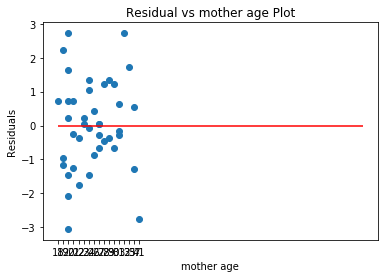

In [28]:
# let's evaluate our model 
# 1. scatter plot of x-values vs residuals
resid = model1.resid
plt.scatter(x, resid)
plt.hlines(0, 0, 60, color = "red")
plt.title("Residual vs mother age Plot")
plt.xlabel("mother age")
plt.ylabel("Residuals")
plt.show()

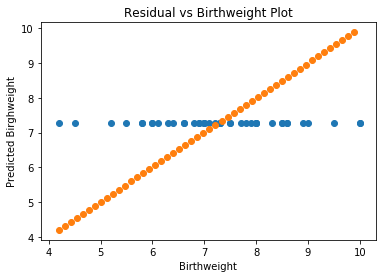

In [29]:
# let's evaluate our model 
# 1. scatter plot of predicted y-values versus y
# plot should be along the diagonals, that indicates a good model 
# the close the plot to the diagonal the more accurate the predicted values. 
pred_y = model1.predict()
plt.scatter(y, pred_y)
plt.title("Residual vs Birthweight Plot")
Max = y.max()
Min = y.min()
diag = np.arange(Min, Max, (Max-Min)/50)
plt.scatter(diag, diag)
plt.xlabel("Birthweight")
plt.ylabel("Predicted Birghweight")
plt.show()

In [30]:
# model 2
x = weightFile[["mppwt"]]
y = weightFile["Birthweight"]

model2 = ols("y ~ x", data=weightFile).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     7.157
Date:                Sat, 02 Jun 2018   Prob (F-statistic):             0.0108
Time:                        01:12:54   Log-Likelihood:                -67.602
No. Observations:                  42   AIC:                             139.2
Df Residuals:                      40   BIC:                             142.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1585      1.547      2.042      0.0

In [31]:
model2.params

Intercept    3.158547
x            0.032622
dtype: float64

In [32]:
model2.pvalues


Intercept    0.047753
x            0.010765
dtype: float64

In [33]:
model2.rsquared


0.15177307940026386

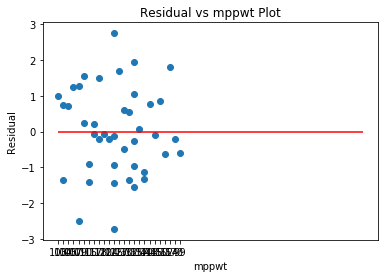

In [34]:
# let's evaluate our model 
# 1. scatter plot of x-values vs residuals
resid = model2.resid
plt.scatter(x, resid)
plt.hlines(0, 0, 60, color = "red")
plt.title("Residual vs mppwt Plot")
plt.xlabel("mppwt")
plt.ylabel("Residual")
plt.show()

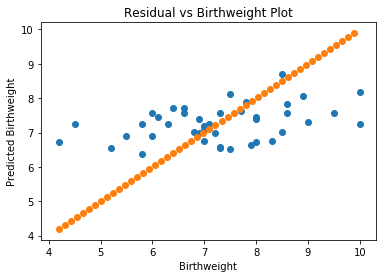

In [35]:
# let's evaluate our model 
# 1. scatter plot of predicted y-values versus y
# plot should be along the diagonals, that indicates a good model 
# the close the plot to the diagonal the more accurate the predicted values. 
pred_y = model2.predict()
plt.scatter(y, pred_y)
plt.title("Residual vs Birthweight Plot")
Max = y.max()
Min = y.min()
diag = np.arange(Min, Max, (Max-Min)/50)
plt.scatter(diag, diag)
plt.xlabel("Birthweight")
plt.ylabel("Predicted Birthweight")
plt.show()

In [36]:
# model 3

x = weightFile[["fage"]]
y = weightFile["Birthweight"]

model3 = ols("y ~ x", data=weightFile).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.291
Date:                Sat, 02 Jun 2018   Prob (F-statistic):              0.263
Time:                        01:13:55   Log-Likelihood:                -70.392
No. Observations:                  42   AIC:                             144.8
Df Residuals:                      40   BIC:                             148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2743      0.895      7.010      0.0

In [37]:
model3.params

Intercept    6.27431
x            0.03425
dtype: float64

In [38]:
model3.pvalues


Intercept    1.819109e-08
x            2.627123e-01
dtype: float64

In [39]:
model3.rsquared


0.031254704013087276

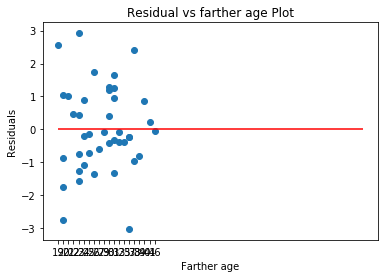

In [40]:
# let's evaluate our model 
# 1. scatter plot of x-values vs residuals
resid = model3.resid
plt.scatter(x, resid)
plt.hlines(0, 0, 60, color = "red")
plt.title("Residual vs farther age Plot")
plt.xlabel("Farther age")
plt.ylabel("Residuals")
plt.show()

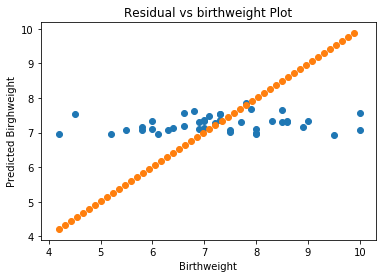

In [41]:
# let's evaluate our model 
# 1. scatter plot of predicted y-values versus y
# plot should be along the diagonals, that indicates a good model 
# the close the plot to the diagonal the more accurate the predicted values. 
pred_y = model3.predict()
plt.scatter(y, pred_y)
plt.title("Residual vs birthweight Plot")
Max = y.max()
Min = y.min()
diag = np.arange(Min, Max, (Max-Min)/50)
plt.scatter(diag, diag)
plt.xlabel("Birthweight")
plt.ylabel("Predicted Birghweight")
plt.show()